In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

C:\Users\ANDREA\AppData\Local\Temp\ipykernel_18784\4065090384.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna("", inplace=True)


Dataset procesado guardado en dataset_politico_ecuador_2023_procesado.csv

Distribución de sentimientos (%):
 Sentimiento
Neutro      68.0
Negativo    32.0
Name: proportion, dtype: float64

Promedio de polarización por candidato:
 Candidato_Mencionado
Bolívar Armijos          -0.052737
Daniel Noboa             -0.076859
Fernando Villavicencio   -0.055645
Jan Topic                -0.059575
Luisa González           -0.056997
Otto Sonnenholzner       -0.064233
Xavier Hervas            -0.059799
Yaku Pérez               -0.066358
Name: Polarización, dtype: float64

Desviación estándar de polarización por candidato:
 Candidato_Mencionado
Bolívar Armijos           0.094742
Daniel Noboa              0.107602
Fernando Villavicencio    0.093151
Jan Topic                 0.098664
Luisa González            0.096260
Otto Sonnenholzner        0.100593
Xavier Hervas             0.100758
Yaku Pérez                0.105314
Name: Polarización, dtype: float64

Top 3 candidatos con más menciones:
 Candid

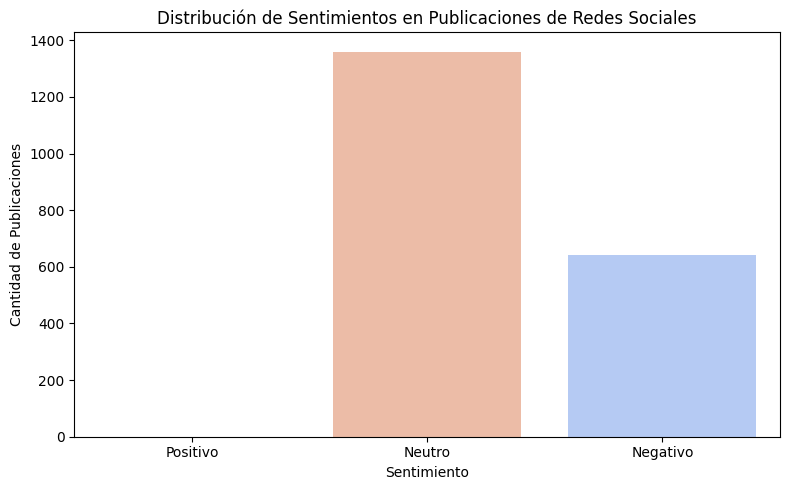

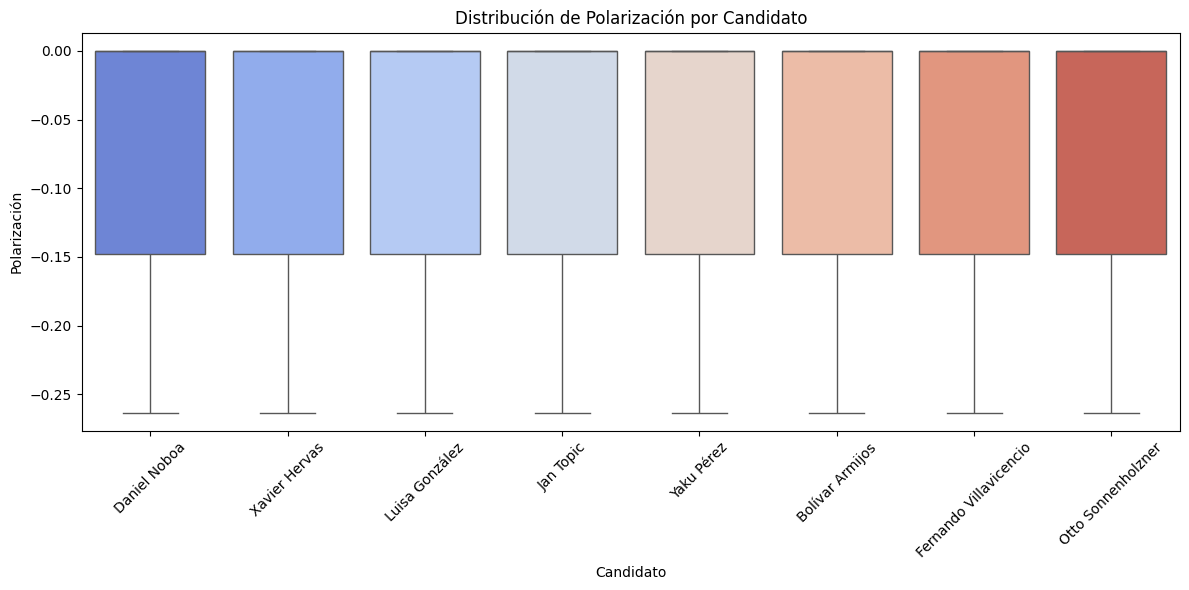

In [15]:
# Cargar el dataset (asegúrate de que el archivo esté en la misma carpeta)
file_path = "dataset_politico_ecuador_2023_corr1.csv"
if not os.path.exists(file_path):
    raise FileNotFoundError(f"El archivo {file_path} no se encontró.")

df = pd.read_csv(file_path)

# Asegurar que la columna 'Texto' existe y es de tipo string
df.fillna("", inplace=True)
if "Texto" not in df.columns:
    raise ValueError("La columna 'Texto' no existe en el dataset.")
df["Texto"] = df["Texto"].astype(str)

# Inicializar el analizador de sentimiento VADER
sentiment_analyzer = SentimentIntensityAnalyzer()

def analizar_sentimiento(texto):
    """
    Analiza el sentimiento combinando VADER y TextBlob utilizando el texto original.
    Retorna:
        - Una etiqueta de sentimiento: "Positivo", "Negativo" o "Neutro"
        - El valor de polarización (float)
    """
    if not texto.strip():
        return "Neutro", 0.0
    try:
        vader_score = sentiment_analyzer.polarity_scores(texto)["compound"]
        textblob_score = TextBlob(texto).sentiment.polarity
        polarizacion = (vader_score + textblob_score) / 2
        
        if polarizacion > 0.05:
            return "Positivo", polarizacion
        elif polarizacion < -0.05:
            return "Negativo", polarizacion
        else:
            return "Neutro", polarizacion
    except Exception as e:
        print(f"Error en análisis de sentimiento: {e}")
        return "Neutro", 0.0

# Aplicar el análisis de sentimiento al texto original
df[["Sentimiento", "Polarización"]] = df["Texto"].apply(lambda x: pd.Series(analizar_sentimiento(x)))

# Guardar el dataset procesado en una ubicación accesible para descarga
output_file = "dataset_politico_ecuador_2023_procesado.csv"  # Se guardará en la misma carpeta del script
df.to_csv(output_file, index=False)
print(f"Dataset procesado guardado en {output_file}")

#Distribución de sentimientos en porcentaje
sentimiento_counts = df["Sentimiento"].value_counts(normalize=True) * 100
print("\nDistribución de sentimientos (%):\n", sentimiento_counts)

# Promedio de polarización por candidato
if "Candidato_Mencionado" in df.columns:
    polarizacion_candidatos = df.groupby("Candidato_Mencionado")["Polarización"].mean()
    print("\nPromedio de polarización por candidato:\n", polarizacion_candidatos)

# Desviación estándar de la polarización por candidato
    std_polarizacion = df.groupby("Candidato_Mencionado")["Polarización"].std()
    print("\nDesviación estándar de polarización por candidato:\n", std_polarizacion)

# Top 3 candidatos con más menciones
    top_candidatos = df["Candidato_Mencionado"].value_counts().head(3)
    print("\nTop 3 candidatos con más menciones:\n", top_candidatos)

# Visualización de la distribución de sentimientos
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="Sentimiento", hue="Sentimiento", order=["Positivo", "Neutro", "Negativo"], palette="coolwarm", legend=False)
plt.title("Distribución de Sentimientos en Publicaciones de Redes Sociales")
plt.xlabel("Sentimiento")
plt.ylabel("Cantidad de Publicaciones")
plt.tight_layout()
plt.show()

# Visualización de tendencias por candidato
if "Candidato_Mencionado" in df.columns:
    plt.figure(figsize=(12,6))
    sns.boxplot(data=df, x="Candidato_Mencionado", y="Polarización", hue="Candidato_Mencionado", palette="coolwarm", legend=False)
    plt.xticks(rotation=45)
    plt.title("Distribución de Polarización por Candidato")
    plt.xlabel("Candidato")
    plt.ylabel("Polarización")
    plt.tight_layout()
    plt.show()
else:
    print("La columna 'Candidato_Mencionado' no se encontró en el dataset para el análisis de tendencias por candidato.")

Dataset procesado guardado en dataset_politico_ecuador_2023_procesado.csv

Precisión de Random Forest: 1.0

Reporte de Clasificación - Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



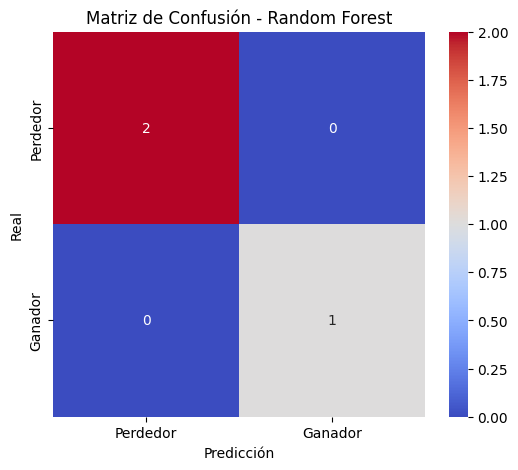

C:\Users\ANDREA\AppData\Local\Temp\ipykernel_18784\260028976.py:102: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_features, x="Importancia", y="Característica", palette="coolwarm")


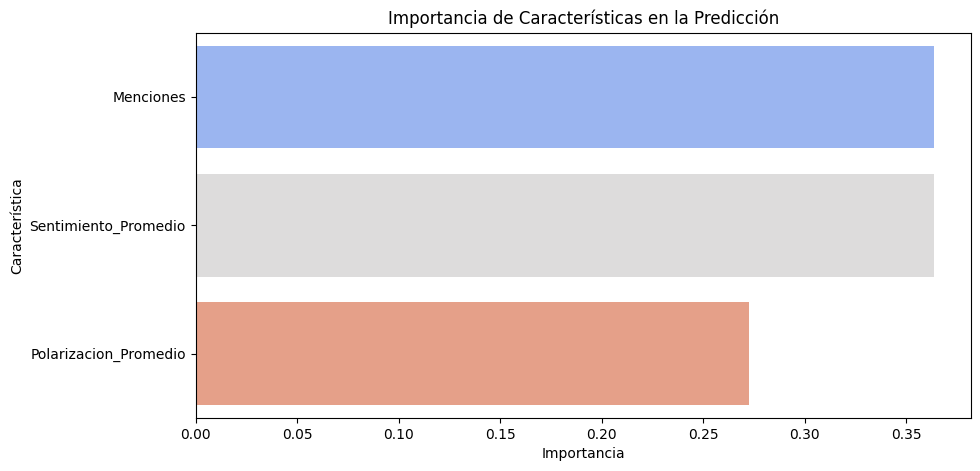

C:\Users\ANDREA\AppData\Local\Temp\ipykernel_18784\260028976.py:111: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_model_sorted, x="Candidato_Mencionado", y="Menciones", palette="coolwarm")


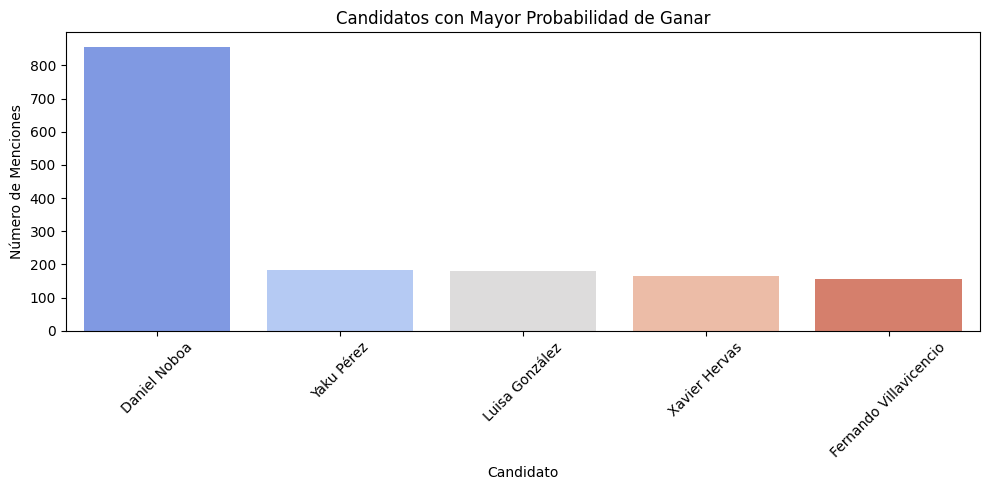

In [16]:
# Cargar el dataset (asegúrate de que el archivo esté en la misma carpeta)
file_path = "dataset_politico_ecuador_2023_corr1.csv"
if not os.path.exists(file_path):
    raise FileNotFoundError(f"El archivo {file_path} no se encontró.")

df = pd.read_csv(file_path)

# Asegurar que la columna 'Texto' existe y es de tipo string
df.fillna(value={col: "" if df[col].dtype == 'object' else np.nan for col in df.columns}, inplace=True)
if "Texto" not in df.columns:
    raise ValueError("La columna 'Texto' no existe en el dataset.")
df["Texto"] = df["Texto"].astype(str)

# Inicializar el analizador de sentimiento VADER
sentiment_analyzer = SentimentIntensityAnalyzer()

def analizar_sentimiento(texto):
    """
    Analiza el sentimiento combinando VADER y TextBlob utilizando el texto original.
    Retorna:
        - Una etiqueta de sentimiento: "Positivo", "Negativo" o "Neutro"
        - El valor de polarización (float)
    """
    if not texto.strip():
        return "Neutro", 0.0
    
    try:
        vader_score = sentiment_analyzer.polarity_scores(texto)["compound"]
        textblob_score = TextBlob(texto).sentiment.polarity
        polarizacion = (vader_score + textblob_score) / 2
        
        if polarizacion > 0.2:
            return "Positivo", polarizacion
        elif polarizacion < -0.2:
            return "Negativo", polarizacion
        else:
            return "Neutro", polarizacion
    except Exception as e:
        print(f"Error en análisis de sentimiento: {e}")
        return "Neutro", 0.0

# Aplicar el análisis de sentimiento al texto original
df[["Sentimiento", "Polarización"]] = df["Texto"].apply(lambda x: pd.Series(analizar_sentimiento(x)))

# Guardar el dataset procesado en una ubicación accesible para descarga
output_file = "dataset_politico_ecuador_2023_procesado.csv"
df.to_csv(output_file, index=False)
print(f"Dataset procesado guardado en {output_file}")

# Modelo predictivo
sentimiento_map = {"Positivo": 1, "Neutro": 0, "Negativo": -1}
df["Sentimiento_Numerico"] = df["Sentimiento"].map(sentimiento_map)

df_model = df.groupby("Candidato_Mencionado").agg(
    Menciones=("Candidato_Mencionado", "count"),
    Sentimiento_Promedio=("Sentimiento_Numerico", "mean"),
    Polarizacion_Promedio=("Polarización", "mean")
).reset_index()

# Crear la columna 'Ganador' con valores predeterminados en 0
df_model["Ganador"] = 0

# Garantizar que al menos dos candidatos sean ganadores
df_model = df_model.sort_values(by="Menciones", ascending=False)
df_model.loc[df_model.index[:2], "Ganador"] = 1  # Asignar 1 a los dos más mencionados

X = df_model[["Menciones", "Sentimiento_Promedio", "Polarizacion_Promedio"]]
y = df_model["Ganador"]

# Verificar que haya suficientes ejemplos en ambas clases
if y.nunique() < 2:
    raise ValueError("No hay suficientes ejemplos en ambas clases para entrenamiento.")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print("\nPrecisión de Random Forest:", acc_rf)

# Métricas detalladas para Random Forest
print("\nReporte de Clasificación - Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Matriz de confusión para Random Forest
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap="coolwarm", xticklabels=["Perdedor", "Ganador"], yticklabels=["Perdedor", "Ganador"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Random Forest")
plt.show()

# Gráfico de importancia de características
top_features = pd.DataFrame({
    "Característica": X.columns,
    "Importancia": rf_model.feature_importances_
}).sort_values(by="Importancia", ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(data=top_features, x="Importancia", y="Característica", palette="coolwarm")
plt.title("Importancia de Características en la Predicción")
plt.xlabel("Importancia")
plt.ylabel("Característica")
plt.show()

# Gráfico de candidatos con mayor probabilidad de ganar
df_model_sorted = df_model.sort_values(by="Menciones", ascending=False).head(5)
plt.figure(figsize=(10,5))
sns.barplot(data=df_model_sorted, x="Candidato_Mencionado", y="Menciones", palette="coolwarm")
plt.title("Candidatos con Mayor Probabilidad de Ganar")
plt.xlabel("Candidato")
plt.ylabel("Número de Menciones")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ANDREA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


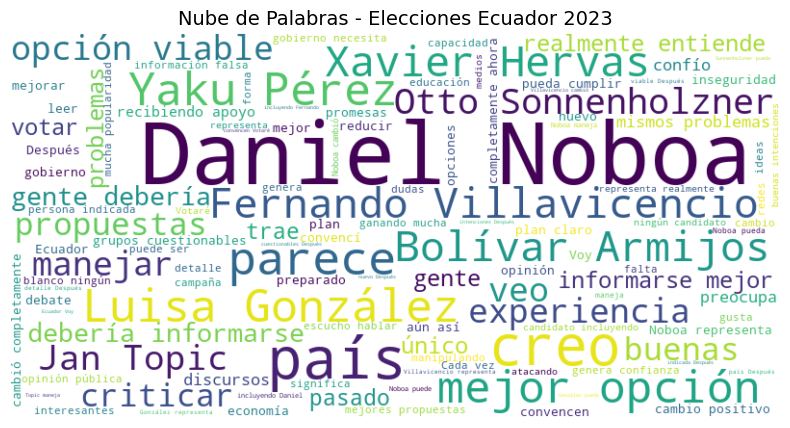

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords

# Descargar stopwords en español
nltk.download('stopwords')
spanish_stopwords = set(stopwords.words('spanish'))

# Cargar el dataset (ajusta la ruta del archivo según sea necesario)
file_path = "dataset_politico_ecuador_2023_procesado.csv"
df = pd.read_csv(file_path)

# Concatenar todos los textos en un solo string
texto_completo = " ".join(df["Texto"].astype(str))

# Configurar la WordCloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white",
    stopwords=spanish_stopwords | STOPWORDS,  # Agregar stopwords en español y de WordCloud
    colormap="viridis",
    max_words=200
).generate(texto_completo)

# Mostrar la WordCloud
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Ocultar ejes
plt.title("Nube de Palabras - Elecciones Ecuador 2023", fontsize=14)
plt.show()


<Figure size 1200x600 with 0 Axes>

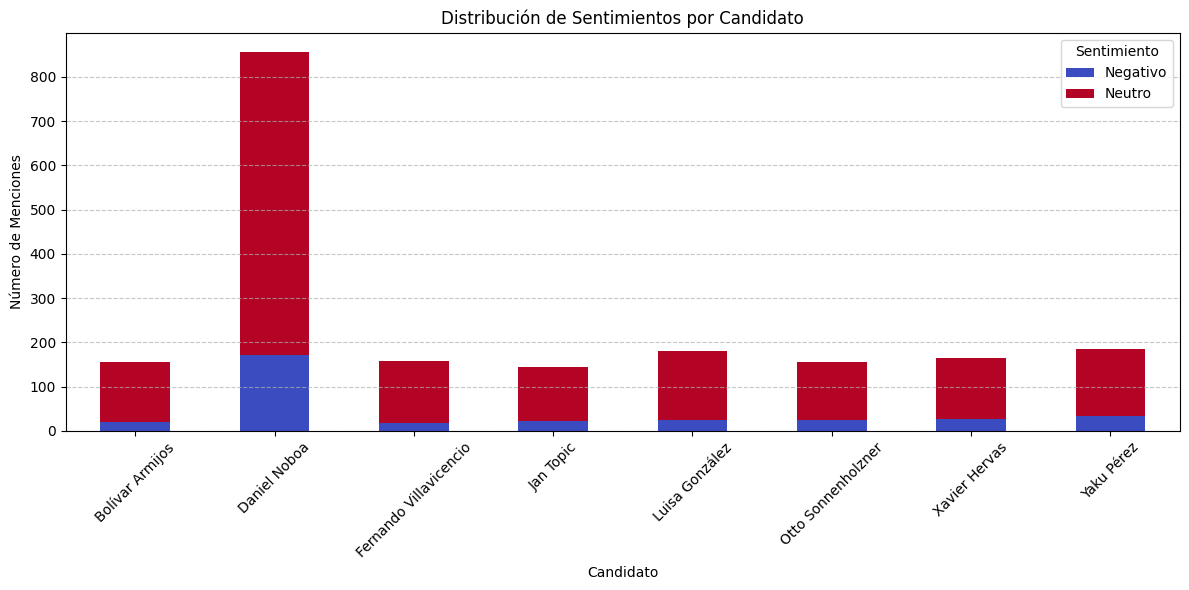

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset (ajusta la ruta del archivo según sea necesario)
file_path = "dataset_politico_ecuador_2023_procesado.csv"
df = pd.read_csv(file_path)

# Verificar que las columnas necesarias existan en el dataset
if "Candidato_Mencionado" not in df.columns or "Sentimiento" not in df.columns:
    raise ValueError("Las columnas necesarias 'Candidato_Mencionado' o 'Sentimiento' no están en el dataset.")

# Contar la cantidad de menciones por sentimiento y candidato
sentimientos_por_candidato = df.groupby(["Candidato_Mencionado", "Sentimiento"]).size().unstack(fill_value=0)

# Crear la visualización
plt.figure(figsize=(12,6))
sentimientos_por_candidato.plot(kind="bar", stacked=True, figsize=(12,6), colormap="coolwarm")

# Configuración de la gráfica
plt.title("Distribución de Sentimientos por Candidato")
plt.xlabel("Candidato")
plt.ylabel("Número de Menciones")
plt.xticks(rotation=45)
plt.legend(title="Sentimiento")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Mostrar la gráfica
plt.tight_layout()
plt.show()


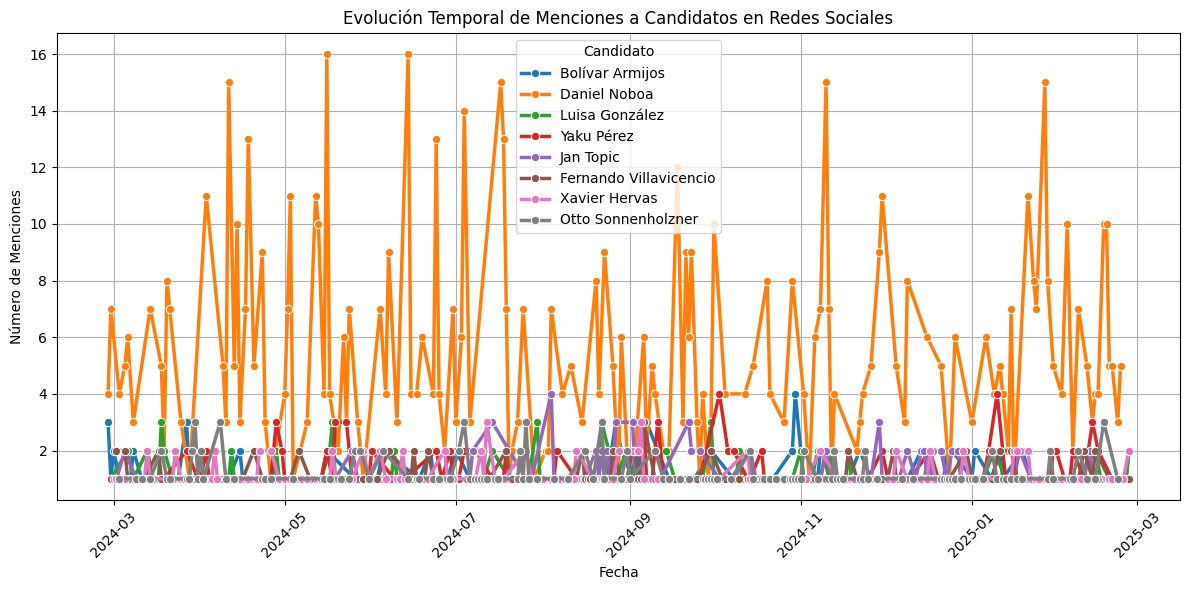

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset procesado (asegúrate de que contenga una columna "Fecha" y "Candidato_Mencionado")
file_path = "dataset_politico_ecuador_2023_procesado.csv"
df = pd.read_csv(file_path)

# Convertir la columna de fecha a tipo datetime
df["Fecha"] = pd.to_datetime(df["Fecha"], errors="coerce")

# Filtrar datos con fechas válidas
df = df.dropna(subset=["Fecha"])

# Agrupar por fecha y candidato, contando las menciones
df_menciones = df.groupby(["Fecha", "Candidato_Mencionado"]).size().reset_index(name="Menciones")

# Crear gráfico de líneas para visualizar la evolución de menciones por candidato
plt.figure(figsize=(12,6))
sns.lineplot(data=df_menciones, x="Fecha", y="Menciones", hue="Candidato_Mencionado", marker="o", linewidth=2.5)

# Personalizar gráfico
plt.title("Evolución Temporal de Menciones a Candidatos en Redes Sociales")
plt.xlabel("Fecha")
plt.ylabel("Número de Menciones")
plt.xticks(rotation=45)
plt.legend(title="Candidato")
plt.grid(True)
plt.tight_layout()

# Mostrar gráfico
plt.show()
